In [5]:
import asyncio
import csv
from twscrape import API
from twscrape.logger import set_log_level

In [ ]:
import pandas as pd
import asyncio

async def main():
    api = API()
    q = "TNelection2024"
    
    # Define field names and initialize an empty DataFrame
    fieldnames = ['id', 'username', 'content', 'lang', 'mentioned-users', 'view-count']
    data = []  # List to store dictionaries of tweet data
    
    # Fetch tweets asynchronously and store in list
    async for tweet in api.search(q, limit=100):
        tweet_data = {
            'id': tweet.id,
            'username': tweet.user.username,
            'content': tweet.rawContent,
            'lang': tweet.lang,
            'mentioned-users': tweet.mentionedUsers,
            'view-count': tweet.viewCount
        }
        data.append(tweet_data)
    
    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data, columns=fieldnames)
    
    return df  # Return the DataFrame

In [9]:
# Directly await the function without wrapping it
df = await main()
print(df)

                      id         username  \
0    1783028098344341920   newstnofficial   
1    1782799296712032568     ZeeTamilNews   
2    1781578548739965290      ridgewallet   
3    1782791111964278825     thewhistletv   
4    1782769352883810621     thewhistletv   
..                   ...              ...   
119  1781329868682408090  SathyaPriya_Off   
120  1781329417249452276      rameshraj27   
121  1781329071722426774  updatenewstamil   
122  1781329015862661238    updatenews360   
123  1781328228885639247     prabaharanms   

                                               content lang mentioned-users  \
0    இந்த காரணம் போதும் சமாளிக்க.. | Kanimozhi | MK...   et              []   
1    பிரச்சாரத்துக்கு வர்றாங்க.. பிரச்சனைக்கு வருவத...   ta              []   
2    Rethink your everyday with Ridge. Explore wall...   en              []   
3    Link: https://t.co/vsqk4bl9TI\n\nகேவலம் ஓட்டுக...   ta              []   
4    Link: https://t.co/vsqk4bkC4a\n\nEVM வெச்சு கூ...   ta     

In [10]:
display(df)

,id,username,content,lang,mentioned-users,view-count
0,1783028098344341920,newstnofficial,இந்த காரணம் போதும் சமாளிக்க.. | Kanimozhi | MK...,et,[],22
1,1782799296712032568,ZeeTamilNews,பிரச்சாரத்துக்கு வர்றாங்க.. பிரச்சனைக்கு வருவத...,ta,[],311
2,1781578548739965290,ridgewallet,Rethink your everyday with Ridge. Explore wall...,en,[],3102575
3,1782791111964278825,thewhistletv,Link: https://t.co/vsqk4bl9TI\n\nகேவலம் ஓட்டுக...,ta,[],24
4,1782769352883810621,thewhistletv,Link: https://t.co/vsqk4bkC4a\n\nEVM வெச்சு கூ...,ta,[],22
...,...,...,...,...,...,...
119,1781329868682408090,SathyaPriya_Off,#TNElection2024 #Tamilnadu \n72.09% 👍\n\n#Elec...,und,[],99
120,1781329417249452276,rameshraj27,#TNElection2024 overall voter turnout 72.09% h...,en,[],74
121,1781329071722426774,updatenewstamil,பூத் சிலிப் கொடுக்கும் போதே பணம் கொடுத்துட்டாங...,ta,[],236
122,1781329015862661238,updatenews360,பூத் சிலிப் கொடுக்கும் போதே பணம் கொடுத்துட்டாங...,ta,[],119


## Without Data Limits

In [ ]:
import pandas as pd
import asyncio
from tqdm import tqdm
from twscrape.logger import set_log_level

async def main():
    api = API()
    q = "TNelection2024"
    limit = 100  # Your predefined limit
    data = []
    
    # Initialize tqdm with the known limit
    pbar = tqdm(total=limit, desc="Fetching tweets")

    tweet_count = 0  # Initialize a counter for tweets
    async for tweet in api.search(q, limit=limit):
        tweet_data = {
            'id': tweet.id,
            'username': tweet.user.username,
            'content': tweet.rawContent,
            'lang': tweet.lang,
            'mentioned-users': tweet.mentionedUsers,
            'view-count': tweet.viewCount
        }
        data.append(tweet_data)
        tweet_count += 1  # Increment the tweet counter
        pbar.update(1)  # Update the progress bar by one step for each tweet processed
        pbar.set_description(f"Processed {tweet_count} tweets")  # Update description with count of tweets processed

    pbar.close()  # Close the progress bar after loop completion
    
    df = pd.DataFrame(data)
    return df

# In a Jupyter notebook, you would run:
# df = await main()

## With Data Range

In [8]:
import re
import pandas as pd
import asyncio
from tqdm.notebook import tqdm
from twscrape import API
from twscrape.logger import set_log_level

## Suppress Warnings

In [11]:
import logging
logging.basicConfig(level=logging.ERROR)

## single query

In [32]:
async def main(q):
    api = API()
    limit = 100  # Attempt to fetch 5000 tweets
    data = []
    
    # Initialize tqdm with the known limit
    pbar = tqdm(total=limit, desc="Fetching tweets")

    tweet_count = 0  # Initialize a counter for tweets
    try:
        async for tweet in api.search(q, limit=limit):

            tweet_data = {
                'id': tweet.id,  # Unique identifier for the tweet
                'username': tweet.user.username if tweet.user else None,  # Username of the user who posted the tweet
                'date': tweet.date, # Date it was posted
                # 'coordinates': tweet.coordinates,
                'content': tweet.rawContent,  # Full text of the tweet
                'lang': tweet.lang,  # Language of the tweet
                'date': tweet.date,  # Date when the tweet was posted
                'likeCount': tweet.likeCount,  # Number of likes
                'retweetCount': tweet.retweetCount,  # Number of retweets
                'replyCount': tweet.replyCount,  # Number of replies
                'quoteCount': tweet.quoteCount,  # Number of times this tweet was quoted
                #'hashtags': [hashtag.text for hashtag in tweet.hashtags] if tweet.hashtags else [],  # List of hashtags used in the tweet
                'mentionedUsers': [user.username for user in tweet.mentionedUsers] if tweet.mentionedUsers else [],  # List of users mentioned in the tweet
                'links': [link.url for link in tweet.links] if tweet.links else []  # List of links in the tweet
            }
            
            data.append(tweet_data)
            tweet_count += 1  # Increment the tweet counter
            pbar.update(1)  # Update the progress bar by one step for each tweet processed
            pbar.set_description(f"Processed {tweet_count} tweets")  # Update description with count of tweets processed

    except Exception as e:
        print(f"Error fetching tweets: {e}")
    finally:
        pbar.close()  # Ensure the progress bar is closed

    df = pd.DataFrame(data)
    return df

def sanitize_filename(query):
    """Sanitize the query string to create a valid filename."""
    
    return re.sub(r'[:\s]', '_', query)
    #return re.sub(r'[^\w\s-]', '', query.replace(':', '_').replace(' ', '_'))

async def run_and_save():
    query = "#மக்களின்_சின்னம்_மைக்  since:2023-04-15 until:2024-04-15"
    df = await main(query)
    filename = sanitize_filename(query.split(' ')[0]) + '.csv'  # Extract base query and convert to filename
    df.to_csv(filename, index=False)
    return f"Data saved to {filename}"

# If using other IDE's other than Jupyter Notebook
# if __name__ == "__main__":
#     asyncio.run(run_and_save())

In [33]:
# Run the function and print the result
result = await run_and_save()
print(result)

Fetching tweets:   0%|          | 0/100 [00:00<?, ?it/s]

Data saved to #மக்களின்_சின்னம்_மைக்.csv


In [27]:
# async def inspect_user_fields(q):
#     api = API()
#     try:
#         # Fetch the first tweet to examine
#         async for tweet in api.search(q, limit=1):
#             if hasattr(tweet, 'user') and tweet.user:
#                 # Directly print each attribute and its value
#                 for attr in dir(tweet.user):
#                     if not attr.startswith("__"):
#                         print(f"{attr}: {getattr(tweet.user, attr)}")
#             else:
#                 print("No user data available.")
#             break  # Only check the first tweet
#     except Exception as e:
#         print(f"Error inspecting user fields: {e}")

# # Example use
# # if __name__ == "__main__":
# query = "BJP since:2024-02-15 until:2024-04-15"
# # asyncio.run(inspect_tweet_fields(query))
# print(query)
# await inspect_tweet_fields(query)

## Multiple Query

In [ ]:
import pandas as pd
import asyncio
from tqdm.notebook import tqdm
from twscrape import API

async def main(q):
    api = API()
    limit = 5000  # Adjust the limit as needed
    data = []
    pbar = tqdm(total=limit, desc=f"Fetching tweets for '{q}'")
    tweet_count = 0
    try:
        async for tweet in api.search(q, limit=limit):
            tweet_data = {
                'id': tweet.id,
                'username': tweet.user.username if tweet.user else None,
                'date': tweet.date,
                'content': tweet.rawContent,
                'lang': tweet.lang,
                'likeCount': tweet.likeCount,
                'retweetCount': tweet.retweetCount,
                'replyCount': tweet.replyCount,
                'quoteCount': tweet.quoteCount,
                'mentionedUsers': [user.username for user in tweet.mentionedUsers] if tweet.mentionedUsers else [],
                'links': [link.url for link in tweet.links] if tweet.links else []
            }
            data.append(tweet_data)
            tweet_count += 1
            pbar.update(1)
            pbar.set_description(f"Processed {tweet_count} tweets")
    except Exception as e:
        print(f"Error fetching tweets: {e}")
    finally:
        pbar.close()
    return pd.DataFrame(data)

def sanitize_filename(query):
    import re
    return re.sub(r'[^\w\s-]', '', query.replace(':', '_').replace(' ', '_'))

async def run_and_save(queries):
    for query in queries:
        df = await main(query)
        filename = sanitize_filename(query.split(' ')[0]) + '.csv'
        df.to_csv(filename, index=False)
        print(f"Data saved to {filename}")

# List of queries
queries = [
    "TNelection2024 since:2023-04-15 until:2024-04-15",
    "TNelection2024 since:2023-04-15 until:2024-04-15",
    "TNelection2024 since:2023-04-15 until:2024-04-15""
]

# Execute run_and_save with the list of queries
if __name__ == "__main__":
    asyncio.run(run_and_save(queries))

In [28]:
# Run the function and print the result
result = await run_and_save()
print(result)

Fetching tweets:   0%|          | 0/100 [00:00<?, ?it/s]

2024-04-24 19:53:58.402 | WARNING  | twscrape.models:_parse_card:502 - Unknown card type '745291183405076480:broadcast' on https://twitter.com/TNReport24/status/1774033479136907637
2024-04-24 19:53:58.402 | WARNING  | twscrape.models:_parse_card:502 - Unknown card type '745291183405076480:broadcast' on https://twitter.com/TNReport24/status/1773989265418187012
2024-04-24 19:53:58.413 | WARNING  | twscrape.models:_parse_card:502 - Unknown card type '745291183405076480:broadcast' on https://twitter.com/TNReport24/status/1773643822305882162
2024-04-24 19:53:58.414 | WARNING  | twscrape.models:_parse_card:502 - Unknown card type '745291183405076480:broadcast' on https://twitter.com/TNReport24/status/1773312971105853763
2024-04-24 19:53:58.414 | WARNING  | twscrape.models:_parse_card:502 - Unknown card type '745291183405076480:broadcast' on https://twitter.com/TNReport24/status/1773257362360741889
2024-04-24 19:53:58.414 | WARNING  | twscrape.models:_parse_card:502 - Unknown card type '74529

Data saved to TNelection2024.csv


In [29]:
df = pd.read_csv("TNelection2024.csv")
df.head(10)

,id,username,date,coordinates,content,lang,likeCount,retweetCount,replyCount,quoteCount,mentionedUsers,links
0,1779413034559275160,TNelectionsCEO,2024-04-14 07:35:01+00:00,NaN,Make sure you vote on April 19th.\n\n#SVEEP #M...,en,4,6,3,1,[],[]
1,1779412757122806190,TNelectionsCEO,2024-04-14 07:33:55+00:00,NaN,Call 1950 for election-related queries and for...,en,8,5,0,0,[],[]
2,1781578548739965290,ridgewallet,2024-04-20 07:00:00+00:00,NaN,Rethink your everyday with Ridge. Explore wall...,en,253,64,88,15,[],[]
3,1779353719148012031,cudcollector,2024-04-14 03:39:20+00:00,NaN,#ECI #ECISVEEP #Cuddalore #GeneralElections202...,qme,4,0,0,0,[],[]
4,1779006783803007212,TNelectionsCEO,2024-04-13 04:40:44+00:00,NaN,"Nothing like voting, I vote for sure.\n\n#SVEE...",en,12,6,5,0,[],[]
5,1779006021081411905,TNelectionsCEO,2024-04-13 04:37:42+00:00,NaN,Make sure you vote on April 19th.\n\n#SVEEP #M...,en,8,5,2,0,[],[]
6,1778860855959937209,TamilanSankar,2024-04-12 19:00:52+00:00,NaN,நாம் தமிழர் வெற்றி: தமிழ்த்தேசியம் முன்னேற்றம்...,ta,1,1,0,0,[],['https://youtu.be/Eh5rye6cnvo?si=8GTNJsPN-wXD...
7,1767298081694040256,Maverik,2024-03-11 21:14:32+00:00,NaN,Don’t miss out on Freebie Friday! Maverik hook...,en,242,30,326,8,[],[]
8,1778796444142780580,cudcollector,2024-04-12 14:44:55+00:00,NaN,#ECI #ECISVEEP #Cuddalore #GeneralElections202...,qme,3,0,0,0,[],[]
9,1778689757070905455,NamakagaTV,2024-04-12 07:40:59+00:00,NaN,'ஸ்கேன் பண்ணுங்க... ஸ்கேம் பாருங்க' | SOUTHERN...,vi,0,0,0,0,[],[]


## Concurrency

In [ ]:
# import pandas as pd
# import asyncio
# from tqdm import tqdm

# async def fetch_tweets(api, q, limit, pbar, data):
#     async for tweet in api.search(q, limit=limit):
#         tweet_data = {
#             'id': tweet.id,
#             'username': tweet.user.username,
#             'content': tweet.rawContent,
#             'lang': tweet.lang,
#             'mentioned-users': tweet.mentionedUsers,
#             'view-count': tweet.viewCount
#         }
#         data.append(tweet_data)
#         pbar.update(1)
#         pbar.set_description(f"Processed {len(data)} tweets")

# async def main():
#     api = API()
#     queries = ["TNelection2024"]  # List of queries if multiple, else just one
#     limit = 100  # Limit per query
#     data = []
    
#     # Initialize tqdm with the known limit
#     pbar = tqdm(total=limit * len(queries), desc="Fetching tweets")

#     # Create tasks for each query
#     tasks = [asyncio.create_task(fetch_tweets(api, q, limit, pbar, data)) for q in queries]
    
#     # Wait for all tasks to complete
#     await asyncio.gather(*tasks)

#     pbar.close()  # Close the progress bar after all tasks complete
    
#     df = pd.DataFrame(data)
#     return df

# # In a Jupyter notebook, you would run:
# # df = await main()

In [36]:
import pandas as pd
import asyncio
from tqdm.notebook import tqdm
from twscrape import API

# Initialize the global tweet counters outside the main function
global_tweet_count = 0
total_tweets_fetched = 0  # This will count all tweets fetched and not reset

async def main(q):
    global global_tweet_count, total_tweets_fetched
    api = API()
    limit = 10000  # Adjust the limit as needed
    data = []
    pbar = tqdm(total=limit, desc=f"Fetching tweets for '{q}'")

    try:
        async for tweet in api.search(q, limit=limit):
            tweet_data = {
                'id': tweet.id,
                'username': tweet.user.username if tweet.user else None,
                'date': tweet.date,
                'content': tweet.rawContent,
                'lang': tweet.lang,
                'likeCount': tweet.likeCount,
                'retweetCount': tweet.retweetCount,
                'replyCount': tweet.replyCount,
                'quoteCount': tweet.quoteCount,
                'mentionedUsers': [user.username for user in tweet.mentionedUsers] if tweet.mentionedUsers else [],
                'links': [link.url for link in tweet.links] if tweet.links else []
            }
            data.append(tweet_data)
            global_tweet_count += 1
            total_tweets_fetched += 1  # Increment the total tweets fetched
            pbar.update(1)
            pbar.set_description(f"Processed {total_tweets_fetched} tweets across all queries")

            # Pause if nearing the global API limit (example: 3500 safe limit)
            if global_tweet_count >= 3500:
                print("Approaching global rate limit, pausing for 20 minutes...")
                await asyncio.sleep(1200)  # Sleep for 20 minutes
                global_tweet_count = 0  # Reset the global count after pause if needed

    except Exception as e:
        print(f"Error fetching tweets for query '{q}': {e}")
    finally:
        pbar.close()

    return pd.DataFrame(data)

def sanitize_filename(query):
    # return re.sub(r'[^\w\s-]', '', query.replace(':', '_').replace(' ', '_'))
    return re.sub(r'[:\s]', '_', query)

async def run_and_save(queries):
    for query in queries:
        df = await main(query)
        filename = sanitize_filename(query) + '.csv'
        df.to_csv(filename, index=False)
        print(f"Data saved to {filename}")

    print(f"Total number of tweets fetched across all queries: {total_tweets_fetched}")
    return f"Total number of tweets fetched across all queries: {total_tweets_fetched}"

# List of queries
# queries = [
#     "#tnelection2024 since:2023-04-15 until:2024-04-15",
#     "#dmk since:2023-04-15 until:2024-04-15",
#     "#admk since:2023-04-15 until:2024-04-15",
#     "#TNBJP since:2023-04-15 until:2024-04-15",
#     "#Annamalai since:2023-04-15 until:2024-04-15",
#     "#மக்களின்_சின்னம்_மைக் since:2023-04-15 until:2024-04-15",
#     "#ByeByeModi since:2023-04-15 until:2024-04-15",
#     "#திருட்டுதிமுக since:2023-04-15 until:2024-04-15",
#     "#DMKFailsTN since:2023-04-15 until:2024-04-15",
#     "#திராவிடமாடல்பரிதாபங்கள் since:2023-04-15 until:2024-04-15",
#     "#DravidianModel since:2023-04-15 until:2024-04-15",
#     "#seeman since:2023-04-15 until:2024-04-15",
#     "#stalin since:2023-04-15 until:2024-04-15"    
# ]
queries = ['TNBJP since:2023-04-15 until:2024-04-15']

In [35]:
# Run the function and print the result
result = await run_and_save(queries)
print(result)

Fetching tweets for '#tnelection2024 since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00<?, ?i…

Data saved to #tnelection2024_since_2023-04-15_until_2024-04-15.csv


Fetching tweets for '#dmk since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00<?, ?it/s]

2024-04-24 21:01:24.589 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:301 - No account available for queue "SearchTimeline". Next available at 21:13:23
2024-04-24 21:13:26.136 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:308 - Continuing with account Arun__P__K on queue SearchTimeline


Data saved to #dmk_since_2023-04-15_until_2024-04-15.csv


Fetching tweets for '#admk since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00<?, ?it/s]

2024-04-24 21:14:12.858 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:301 - No account available for queue "SearchTimeline". Next available at 21:28:29
2024-04-24 21:28:34.572 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:308 - Continuing with account Arun__P__K on queue SearchTimeline
2024-04-24 21:29:18.966 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:301 - No account available for queue "SearchTimeline". Next available at 21:43:37
2024-04-24 21:43:42.628 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:308 - Continuing with account Arun__P__K on queue SearchTimeline


Approaching global rate limit, pausing for 20 minutes...
Error fetching tweets for query '#admk since:2023-04-15 until:2024-04-15': [Errno 11001] getaddrinfo failed
Data saved to #admk_since_2023-04-15_until_2024-04-15.csv


Fetching tweets for '#TNBJP since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00<?, ?it/s]

Error fetching tweets for query '#TNBJP since:2023-04-15 until:2024-04-15': [Errno 11001] getaddrinfo failed
Data saved to #TNBJP_since_2023-04-15_until_2024-04-15.csv


Fetching tweets for '#Annamalai since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00<?, ?it/s]

Error fetching tweets for query '#Annamalai since:2023-04-15 until:2024-04-15': [Errno 11001] getaddrinfo failed
Data saved to #Annamalai_since_2023-04-15_until_2024-04-15.csv


Fetching tweets for '#மக்களின்_சின்னம்_மைக் since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:0…

Error fetching tweets for query '#மக்களின்_சின்னம்_மைக் since:2023-04-15 until:2024-04-15': [Errno 11001] getaddrinfo failed
Data saved to #மக்களின்_சின்னம்_மைக்_since_2023-04-15_until_2024-04-15.csv


Fetching tweets for '#ByeByeModi since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00<?, ?it/s]

Error fetching tweets for query '#ByeByeModi since:2023-04-15 until:2024-04-15': [Errno 11001] getaddrinfo failed
Data saved to #ByeByeModi_since_2023-04-15_until_2024-04-15.csv


Fetching tweets for '#திருட்டுதிமுக since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00<?, ?it…

Error fetching tweets for query '#திருட்டுதிமுக since:2023-04-15 until:2024-04-15': [Errno 11001] getaddrinfo failed
Data saved to #திருட்டுதிமுக_since_2023-04-15_until_2024-04-15.csv


Fetching tweets for '#DMKFailsTN since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00<?, ?it/s]

Error fetching tweets for query '#DMKFailsTN since:2023-04-15 until:2024-04-15': [Errno 11001] getaddrinfo failed
Data saved to #DMKFailsTN_since_2023-04-15_until_2024-04-15.csv


Fetching tweets for '#திராவிடமாடல்பரிதாபங்கள் since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00…

Error fetching tweets for query '#திராவிடமாடல்பரிதாபங்கள் since:2023-04-15 until:2024-04-15': [Errno 11001] getaddrinfo failed
Data saved to #திராவிடமாடல்பரிதாபங்கள்_since_2023-04-15_until_2024-04-15.csv


Fetching tweets for '#DravidianModel since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00<?, ?i…

Error fetching tweets for query '#DravidianModel since:2023-04-15 until:2024-04-15': [Errno 11001] getaddrinfo failed
Data saved to #DravidianModel_since_2023-04-15_until_2024-04-15.csv


Fetching tweets for '#seeman since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00<?, ?it/s]

Error fetching tweets for query '#seeman since:2023-04-15 until:2024-04-15': [Errno 11001] getaddrinfo failed
Data saved to #seeman_since_2023-04-15_until_2024-04-15.csv


Fetching tweets for '#stalin since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00<?, ?it/s]

Data saved to #stalin_since_2023-04-15_until_2024-04-15.csv
Total number of tweets fetched across all queries: 4363
Total number of tweets fetched across all queries: 4363


In [55]:
import pandas as pd
import asyncio
from tqdm.notebook import tqdm
from twscrape import API

# Initialize the global tweet counters outside the main function
global_tweet_count = 0
total_tweets_fetched = 0  # This will count all tweets fetched and not reset

async def main(q):
    global global_tweet_count, total_tweets_fetched
    api = API()
    limit = 10000  # Adjust the limit as needed
    data = []
    pbar = tqdm(total=limit, desc=f"Fetching tweets for '{q}'")

    try:
        async for tweet in api.search(q, limit=limit):
            tweet_data = {
                'id': tweet.id,
                'username': tweet.user.username if tweet.user else None,
                'date': tweet.date,
                'content': tweet.rawContent,
                'lang': tweet.lang,
                'likeCount': tweet.likeCount,
                'retweetCount': tweet.retweetCount,
                'replyCount': tweet.replyCount,
                'quoteCount': tweet.quoteCount,
                'mentionedUsers': [user.username for user in tweet.mentionedUsers] if tweet.mentionedUsers else [],
                'links': [link.url for link in tweet.links] if tweet.links else []
            }
            data.append(tweet_data)
            global_tweet_count += 1
            total_tweets_fetched += 1  # Increment the total tweets fetched
            pbar.update(1)
            pbar.set_description(f"Processed {total_tweets_fetched} tweets across all queries")

            # Pause if nearing the global API limit (example: 3500 safe limit)
            if global_tweet_count >= 35000:
                print("Approaching global rate limit, pausing for 20 minutes...")
                await asyncio.sleep(1200)  # Sleep for 20 minutes
                global_tweet_count = 0  # Reset the global count after pause if needed

    except Exception as e:
        print(f"Error fetching tweets for query '{q}': {e}")
    finally:
        pbar.close()

    return pd.DataFrame(data)

def sanitize_filename(query):
    # return re.sub(r'[^\w\s-]', '', query.replace(':', '_').replace(' ', '_'))
    return re.sub(r'[:\s]', '_', query)

async def run_and_save(queries):
    for query in queries:
        df = await main(query)
        filename = sanitize_filename(query) + '.csv'
        df.to_csv(filename, index=False)
        print(f"Data saved to {filename}")

    print(f"Total number of tweets fetched across all queries: {total_tweets_fetched}")
    return f"Total number of tweets fetched across all queries: {total_tweets_fetched}"

# List of queries
# queries = [
#     "#tnelection2024 since:2023-04-15 until:2024-04-15",
#     "#dmk since:2023-04-15 until:2024-04-15",
#     "#admk since:2023-04-15 until:2024-04-15",
#     "#TNBJP since:2023-04-15 until:2024-04-15",
#     "#Annamalai since:2023-04-15 until:2024-04-15",
#     "#மக்களின்_சின்னம்_மைக் since:2023-04-15 until:2024-04-15",
#     "#ByeByeModi since:2023-04-15 until:2024-04-15",
#     "#திருட்டுதிமுக since:2023-04-15 until:2024-04-15",
#     "#DMKFailsTN since:2023-04-15 until:2024-04-15",
#     "#திராவிடமாடல்பரிதாபங்கள் since:2023-04-15 until:2024-04-15",
#     "#DravidianModel since:2023-04-15 until:2024-04-15",
#     "#seeman since:2023-04-15 until:2024-04-15",
#     "#stalin since:2023-04-15 until:2024-04-15"    
# ]
queries = ['மக்களின்_சின்னம்_மைக் since:2023-04-15 until:2024-04-15']

In [56]:
# Run the function and print the result
print(queries)
result = await run_and_save(queries)
print(result)

['மக்களின்_சின்னம்_மைக் since:2023-04-15 until:2024-04-15']


Fetching tweets for 'மக்களின்_சின்னம்_மைக் since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00…

2024-04-25 14:30:20.491 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:301 - No account available for queue "SearchTimeline". Next available at 14:44:49
2024-04-25 14:37:31.480 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:308 - Continuing with account arunpankuofr on queue SearchTimeline
2024-04-25 14:38:00.377 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:301 - No account available for queue "SearchTimeline". Next available at 14:44:49
2024-04-25 14:40:50.730 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:308 - Continuing with account arunjjj134653 on queue SearchTimeline
2024-04-25 14:41:16.824 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:301 - No account available for queue "SearchTimeline". Next available at 14:44:49
2024-04-25 14:44:37.318 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:308 - Continuing with account arunaggiri96887 on queue SearchTimeline


Data saved to மக்களின்_சின்னம்_மைக்_since_2023-04-15_until_2024-04-15.csv
Total number of tweets fetched across all queries: 3365
Total number of tweets fetched across all queries: 3365


In [65]:
import pandas as pd
import asyncio
from tqdm.notebook import tqdm
from twscrape import API

# Initialize the global tweet counters outside the main function
global_tweet_count = 0
total_tweets_fetched = 0  # This will count all tweets fetched and not reset

async def main(q):
    global global_tweet_count, total_tweets_fetched
    api = API()
    limit = 10000  # Adjust the limit as needed
    data = []
    pbar = tqdm(total=limit, desc=f"Fetching tweets for '{q}'")

    try:
        async for tweet in api.search(q, limit=limit):
            tweet_data = {
                'id': tweet.id,
                'username': tweet.user.username if tweet.user else None,
                'date': tweet.date,
                'content': tweet.rawContent,
                'lang': tweet.lang,
                'likeCount': tweet.likeCount,
                'retweetCount': tweet.retweetCount,
                'replyCount': tweet.replyCount,
                'quoteCount': tweet.quoteCount,
                'mentionedUsers': [user.username for user in tweet.mentionedUsers] if tweet.mentionedUsers else [],
                'links': [link.url for link in tweet.links] if tweet.links else []
            }
            data.append(tweet_data)
            global_tweet_count += 1
            total_tweets_fetched += 1  # Increment the total tweets fetched
            pbar.update(1)
            pbar.set_description(f"Processed {total_tweets_fetched} tweets across all queries")

            # Pause if nearing the global API limit (example: 3500 safe limit)
            if global_tweet_count >= 35000:
                print("Approaching global rate limit, pausing for 20 minutes...")
                await asyncio.sleep(1200)  # Sleep for 20 minutes
                global_tweet_count = 0  # Reset the global count after pause if needed

    except Exception as e:
        print(f"Error fetching tweets for query '{q}': {e}")
    finally:
        pbar.close()

    return pd.DataFrame(data)

def sanitize_filename(query):
    # return re.sub(r'[^\w\s-]', '', query.replace(':', '_').replace(' ', '_'))
    return re.sub(r'[:\s]', '_', query)

async def run_and_save(queries):
    for query in queries:
        df = await main(query)
        filename = sanitize_filename(query) + '.csv'
        df.to_csv(filename, index=False)
        print(f"Data saved to {filename}")

    print(f"Total number of tweets fetched across all queries: {total_tweets_fetched}")
    return f"Total number of tweets fetched across all queries: {total_tweets_fetched}"

# List of queries
# queries = [
#     "#tnelection2024 since:2023-04-15 until:2024-04-15",
#     "#dmk since:2023-04-15 until:2024-04-15",
#     "#admk since:2023-04-15 until:2024-04-15",
#     "#TNBJP since:2023-04-15 until:2024-04-15",
#     "#Annamalai since:2023-04-15 until:2024-04-15",
#     "#மக்களின்_சின்னம்_மைக் since:2023-04-15 until:2024-04-15",
#     "#ByeByeModi since:2023-04-15 until:2024-04-15",
#     "#திருட்டுதிமுக since:2023-04-15 until:2024-04-15",
#     "#DMKFailsTN since:2023-04-15 until:2024-04-15",
#     "#திராவிடமாடல்பரிதாபங்கள் since:2023-04-15 until:2024-04-15",
#     "#DravidianModel since:2023-04-15 until:2024-04-15",
#     "#seeman since:2023-04-15 until:2024-04-15",
#     "#stalin since:2023-04-15 until:2024-04-15" 
#     "NTK"
# ]
queries = ['DMK since:2023-04-15 until:2024-04-15']

In [66]:
# Run the function and print the result
print(queries)
result = await run_and_save(queries)
print(result)

['NTK since:2023-04-15 until:2024-04-15']


Fetching tweets for 'NTK since:2023-04-15 until:2024-04-15':   0%|          | 0/10000 [00:00<?, ?it/s]

2024-04-25 15:13:29.692 | WARNING  | twscrape.queue_client:_check_rep:157 - Ban detected: 200 - 20/50 - arunjjj134653 - (326) Authorization: Denied by access control: To protect our users from spam and other malicious activity, this account is temporarily locked. Please log in to https://twitter.com to unlock your account.
2024-04-25 15:13:38.062 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:301 - No account available for queue "SearchTimeline". Next available at 15:15:01
2024-04-25 15:15:03.266 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:308 - Continuing with account arunaggiri96887 on queue SearchTimeline
2024-04-25 15:16:10.174 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:301 - No account available for queue "SearchTimeline". Next available at 15:17:59
2024-04-25 15:18:00.474 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:308 - Continuing with account indhupraba37190 on queue SearchTimeline
2024-04-25 15:18:28.535 | INFO     | twscra

Data saved to NTK_since_2023-04-15_until_2024-04-15.csv
Total number of tweets fetched across all queries: 8823
Total number of tweets fetched across all queries: 8823


In [95]:
import pandas as pd
import asyncio
from tqdm.notebook import tqdm
from twscrape import API

# Initialize the global tweet counters outside the main function
global_tweet_count = 0
total_tweets_fetched = 0  # This will count all tweets fetched and not reset

async def main(q):
    global global_tweet_count, total_tweets_fetched
    api = API()
    limit = 100000  # Adjust the limit as needed
    data = []
    pbar = tqdm(total=limit, desc=f"Fetching tweets for '{q}'")

    try:
        async for tweet in api.search(q, limit=limit):
            tweet_data = {
                'id': tweet.id,
                'username': tweet.user.username if tweet.user else None,
                'date': tweet.date,
                'content': tweet.rawContent,
                'lang': tweet.lang,
                'likeCount': tweet.likeCount,
                'retweetCount': tweet.retweetCount,
                'replyCount': tweet.replyCount,
                'quoteCount': tweet.quoteCount,
                'mentionedUsers': [user.username for user in tweet.mentionedUsers] if tweet.mentionedUsers else [],
                'links': [link.url for link in tweet.links] if tweet.links else []
            }
            data.append(tweet_data)
            global_tweet_count += 1
            total_tweets_fetched += 1  # Increment the total tweets fetched
            pbar.update(1)
            pbar.set_description(f"Processed {total_tweets_fetched} tweets across all queries")

            # Pause if nearing the global API limit (example: 3500 safe limit)
            if global_tweet_count >= 35000:
                print("Approaching global rate limit, pausing for 20 minutes...")
                await asyncio.sleep(1200)  # Sleep for 20 minutes
                global_tweet_count = 0  # Reset the global count after pause if needed

    except Exception as e:
        print(f"Error fetching tweets for query '{q}': {e}")
    finally:
        pbar.close()

    return pd.DataFrame(data)

def sanitize_filename(query):
    # return re.sub(r'[^\w\s-]', '', query.replace(':', '_').replace(' ', '_'))
    return re.sub(r'[:\s]', '_', query)

async def run_and_save(queries):
    for query in queries:
        df = await main(query)
        filename = sanitize_filename(query) + '.csv'
        df.to_csv(filename, index=False)
        print(f"Data saved to {filename}")

    print(f"Total number of tweets fetched across all queries: {total_tweets_fetched}")
    return f"Total number of tweets fetched across all queries: {total_tweets_fetched}"

# List of queries
queries = [
    "#tnelection2024 since:2023-04-15 until:2024-04-15",
    "#dmk since:2023-04-15 until:2024-04-15",
    "#admk since:2023-04-15 until:2024-04-15",
    "#TNBJP since:2023-04-15 until:2024-04-15",
    "#Annamalai since:2023-04-15 until:2024-04-15",
    "#மக்களின்_சின்னம்_மைக் since:2023-04-15 until:2024-04-15",
    "#ByeByeModi since:2023-04-15 until:2024-04-15",
    "#திருட்டுதிமுக since:2023-04-15 until:2024-04-15",
    "#DMKFailsTN since:2023-04-15 until:2024-04-15",
    "#திராவிடமாடல்பரிதாபங்கள் since:2023-04-15 until:2024-04-15",
    "#DravidianModel since:2023-04-15 until:2024-04-15",
    "#seeman since:2023-04-15 until:2024-04-15",
    "#stalin since:2023-04-15 until:2024-04-15" 
    "NTK"
]
# queries = ['#Edappadi since:2023-04-15 until:2024-04-15']

In [96]:
# Run the function and print the result
print(queries)
result = await run_and_save(queries)
print(result)

['#Edappadi since:2023-04-15 until:2024-04-15']


Fetching tweets for '#Edappadi since:2023-04-15 until:2024-04-15':   0%|          | 0/100000 [00:00<?, ?it/s]

2024-04-25 17:27:07.464 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:301 - No account available for queue "SearchTimeline". Next available at 17:31:59
2024-04-25 17:32:03.388 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:308 - Continuing with account arunaggiri96887 on queue SearchTimeline
2024-04-25 17:32:28.369 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:301 - No account available for queue "SearchTimeline". Next available at 17:32:42
2024-04-25 17:32:43.434 | INFO     | twscrape.accounts_pool:get_for_queue_or_wait:308 - Continuing with account Arun__P__K on queue SearchTimeline


Data saved to #Edappadi_since_2023-04-15_until_2024-04-15.csv
Total number of tweets fetched across all queries: 1314
Total number of tweets fetched across all queries: 1314


In [93]:
import pandas as pd
import asyncio
from tqdm.notebook import tqdm
from twscrape import API

# Initialize the global tweet counters outside the main function
global_tweet_count = 0
total_tweets_fetched = 0  # This will count all tweets fetched and not reset

async def main(q):
    global global_tweet_count, total_tweets_fetched
    api = API()
    limit = 100000  # Adjust the limit as needed
    data = []
    pbar = tqdm(total=limit, desc=f"Fetching tweets for '{q}'")

    try:
        async for tweet in api.search(q, limit=limit):
            tweet_data = {
                'id': tweet.id,
                'username': tweet.user.username if tweet.user else None,
                'date': tweet.date,
                'content': tweet.rawContent,
                'lang': tweet.lang,
                'likeCount': tweet.likeCount,
                'retweetCount': tweet.retweetCount,
                'replyCount': tweet.replyCount,
                'quoteCount': tweet.quoteCount,
                'mentionedUsers': [user.username for user in tweet.mentionedUsers] if tweet.mentionedUsers else [],
                'links': [link.url for link in tweet.links] if tweet.links else []
            }
            data.append(tweet_data)
            global_tweet_count += 1
            total_tweets_fetched += 1  # Increment the total tweets fetched
            pbar.update(1)
            pbar.set_description(f"Processed {total_tweets_fetched} tweets across all queries")

            # Pause if nearing the global API limit (example: 3500 safe limit)
            if global_tweet_count >= 35000:
                print("Approaching global rate limit, pausing for 20 minutes...")
                await asyncio.sleep(1200)  # Sleep for 20 minutes
                global_tweet_count = 0  # Reset the global count after pause if needed

    except Exception as e:
        print(f"Error fetching tweets for query '{q}': {e}")
    finally:
        pbar.close()

    return pd.DataFrame(data)

def sanitize_filename(query):
    # return re.sub(r'[^\w\s-]', '', query.replace(':', '_').replace(' ', '_'))
    return re.sub(r'[:\s]', '_', query)

async def run_and_save(queries):
    for query in queries:
        df = await main(query)
        filename = sanitize_filename(query) + '.csv'
        df.to_csv(filename, index=False)
        print(f"Data saved to {filename}")

    print(f"Total number of tweets fetched across all queries: {total_tweets_fetched}")
    return f"Total number of tweets fetched across all queries: {total_tweets_fetched}"

# List of queries
# queries = [
#     "#tnelection2024 since:2023-04-15 until:2024-04-15",
#     "#dmk since:2023-04-15 until:2024-04-15",
#     "#admk since:2023-04-15 until:2024-04-15",
#     "#TNBJP since:2023-04-15 until:2024-04-15",
#     "#Annamalai since:2023-04-15 until:2024-04-15",
#     "#மக்களின்_சின்னம்_மைக் since:2023-04-15 until:2024-04-15",
#     "#ByeByeModi since:2023-04-15 until:2024-04-15",
#     "#திருட்டுதிமுக since:2023-04-15 until:2024-04-15",
#     "#DMKFailsTN since:2023-04-15 until:2024-04-15",
#     "#திராவிடமாடல்பரிதாபங்கள் since:2023-04-15 until:2024-04-15",
#     "#DravidianModel since:2023-04-15 until:2024-04-15",
#     "#seeman since:2023-04-15 until:2024-04-15",
#     "#stalin since:2023-04-15 until:2024-04-15" 
#     "NTK"
# ]
queries = ['#DravidianModel since:2023-04-15 until:2024-04-15']

In [94]:
# Run the function and print the result
print(queries)
result = await run_and_save(queries)
print(result)

['#DravidianModel since:2023-04-15 until:2024-04-15']


Fetching tweets for '#DravidianModel since:2023-04-15 until:2024-04-15':   0%|          | 0/100000 [00:00<?, ?…

Data saved to #DravidianModel_since_2023-04-15_until_2024-04-15.csv
Total number of tweets fetched across all queries: 228
Total number of tweets fetched across all queries: 228


## Do an analysis to find out how many tweets are there for just TAMIL

In [97]:
pwd

'D:\\Tamil NLP\\Twitter Data'

C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2129943111.py:31: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.
  plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2129943111.py:31: UserWarning: Matplotlib currently does not support Tamil natively.
  plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2129943111.py:31: UserWarning: Glyph 3007 (\N{TAMIL VOWEL SIGN I}) missing from current font.
  plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2129943111.py:31: UserWarning: Glyph 2992 (\N{TAMIL LETTER RA}) missing from current font.
  plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
C:\Users\Arunaggiri Pandian

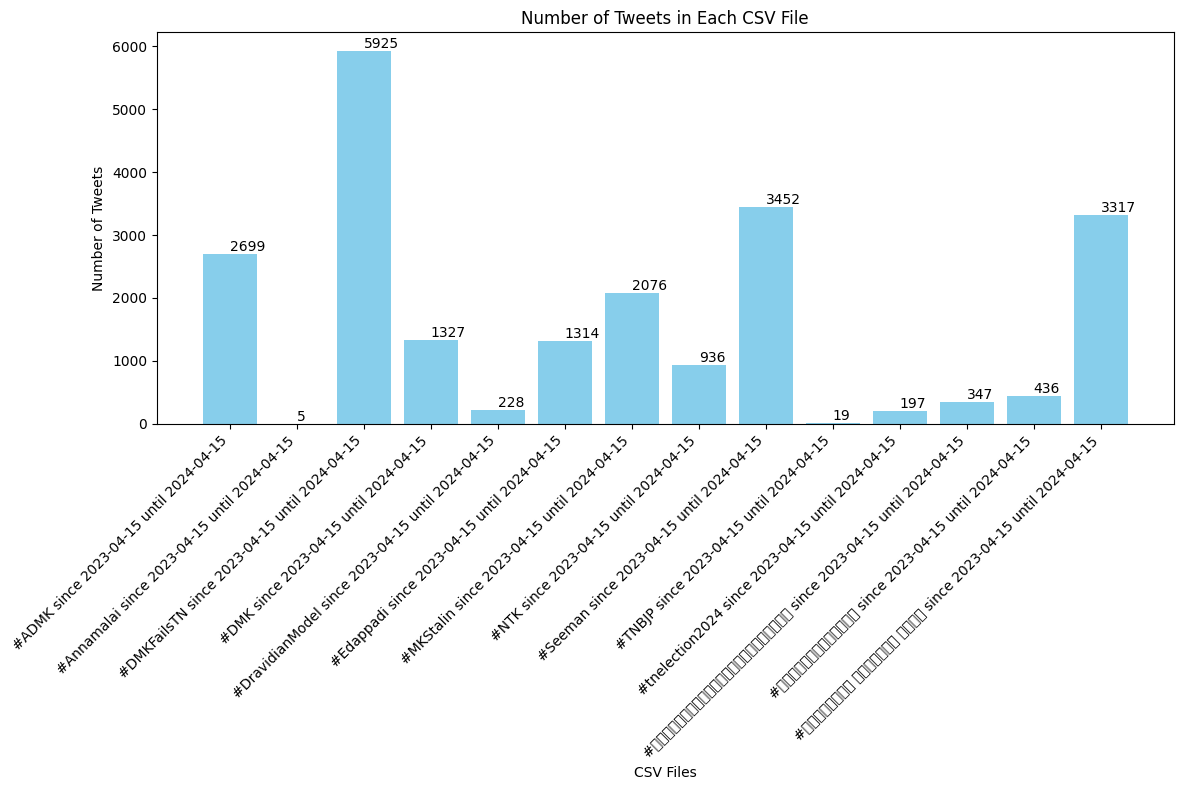

In [104]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def count_tweets_in_csv(directory):
    tweet_counts = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            count = len(df)
            # Extract a cleaner label from the filename for display purposes
            label = filename.replace('.csv', '').replace('_', ' ')
            tweet_counts[label] = count
    return tweet_counts

def plot_tweet_counts(tweet_counts):
    # Set a larger plot size
    plt.figure(figsize=(12, 8))
    # Creating bar chart
    bars = plt.bar(tweet_counts.keys(), tweet_counts.values(), color='skyblue')
    # Adding the count above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment
    
    plt.xlabel('CSV Files')
    plt.ylabel('Number of Tweets')
    plt.title('Number of Tweets in Each CSV File')
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
    plt.show()

# Directory containing your CSV files
directory = 'D:\\Tamil NLP\\Twitter Data'

# Count tweets in each CSV
tweet_counts = count_tweets_in_csv(directory)

# Plot the counts
plot_tweet_counts(tweet_counts)

In [101]:
total_tweets

22278

C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2781353650.py:34: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.
  plt.tight_layout()
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2781353650.py:34: UserWarning: Matplotlib currently does not support Tamil natively.
  plt.tight_layout()
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2781353650.py:34: UserWarning: Glyph 3007 (\N{TAMIL VOWEL SIGN I}) missing from current font.
  plt.tight_layout()
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2781353650.py:34: UserWarning: Glyph 2992 (\N{TAMIL LETTER RA}) missing from current font.
  plt.tight_layout()
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2781353650.py:34: UserWarning: Glyph 3006 (\N{TAMIL VOWEL SIGN AA}) missing from current font.
  plt.tight_layout()
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2781353650.py:34: UserWarning: Glyph 2997 (\N{TAMIL LETTER VA

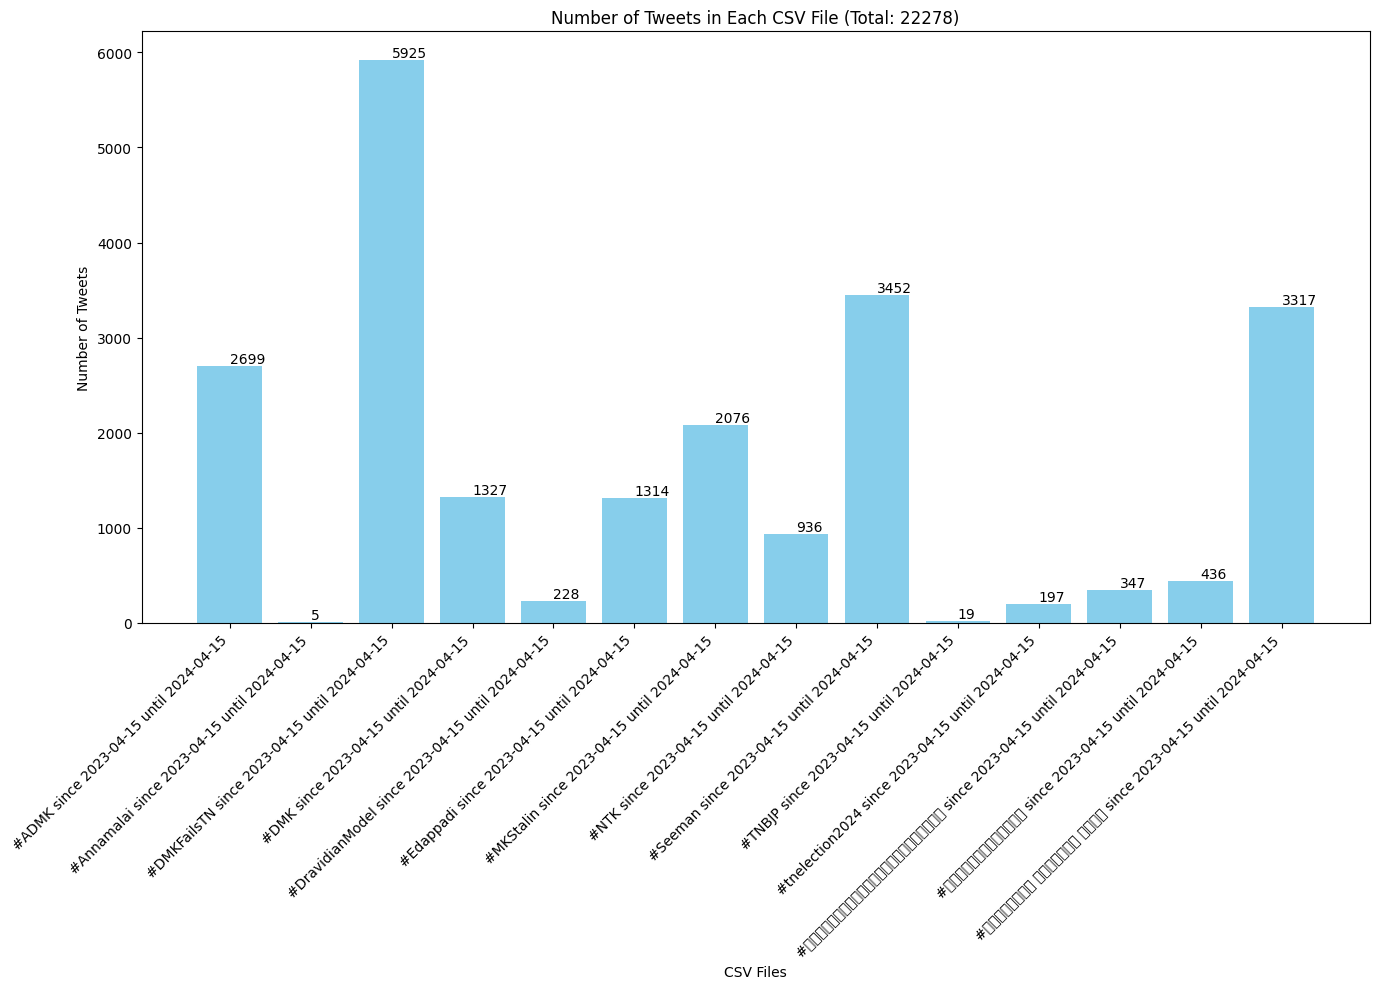

In [106]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib

# Set the font to a font family that supports Tamil characters
matplotlib.rcParams['font.family'] = 'Tamil Sangam MN'

def count_tweets_in_csv(directory):
    tweet_counts = {}
    total_tweets = 0  # Initialize total tweets counter
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            count = len(df)
            total_tweets += count  # Add to total tweets count
            # Simplify the filename to use as a label
            label = filename.replace('.csv', '').replace('_', ' ')
            tweet_counts[label] = count
    return tweet_counts, total_tweets

def plot_tweet_counts(tweet_counts, total_tweets):
    plt.figure(figsize=(14, 10))
    bars = plt.bar(tweet_counts.keys(), tweet_counts.values(), color='skyblue')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')
    
    plt.xlabel('CSV Files')
    plt.ylabel('Number of Tweets')
    plt.title(f'Number of Tweets in Each CSV File (Total: {total_tweets})')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Directory containing your CSV files
directory = 'D:\\Tamil NLP\\Twitter Data'

# Count tweets in each CSV and get total tweets
tweet_counts, total_tweets = count_tweets_in_csv(directory)

# Plot the counts
plot_tweet_counts(tweet_counts, total_tweets)

In [111]:
df = pd.read_csv("#ADMK_since_2023-04-15_until_2024-04-15.csv")
df.head(20)

,id,username,date,content,lang,likeCount,retweetCount,replyCount,quoteCount,mentionedUsers,links
0,1779645254653644887,IbcTamilnadu,2024-04-14 22:57:47+00:00,'நம்பீராத தம்பி' - முதல் தலைமுறை வாக்காளர்களுக...,ta,2,1,0,0,[],['https://ibctamilnadu.com/article/admk-releas...
1,1779628860671131760,IbcTamilnadu,2024-04-14 21:52:38+00:00,ராயபுரத்தில் முடிசூடா மன்னனாக இருந்தேன் - பாஜக...,ta,1,0,0,0,[],['https://ibctamilnadu.com/article/admk-jayaku...
2,1779604700662517906,egvijayanand,2024-04-14 20:16:38+00:00,144 தடை உத்தரவை மீறிய அந்த திமுக சட்டமன்ற உறுப...,ta,0,0,0,0,[],[]
3,1779491657903194427,News18TamilNadu,2024-04-14 12:47:27+00:00,#JUSTIN தூத்துக்குடி துப்பாக்கிச்சூடுக்கு திமு...,ta,679,158,79,34,[],['http://News18Tamil.com']
4,1779585438224924684,nalainamate77,2024-04-14 19:00:06+00:00,ப்ரவுடு கண்ணடிகா \n #selfish அமலை பிறப்பதற்கு ...,ta,34,12,0,0,[],[]
5,1779582005623259340,kalpanamanikan6,2024-04-14 18:46:27+00:00,அதிமுக இருக்காதுன்னு நிறைய பேர் சொல்லியிருக்கா...,ta,8,1,0,1,[],[]
6,1779578312165343611,BaluSullia2,2024-04-14 18:31:47+00:00,@polimernews Tamilnadu People #DMK Serepale Ad...,et,0,0,0,0,['polimernews'],[]
7,1779573965377372338,KumarN49742958,2024-04-14 18:14:30+00:00,#யாகாவாராயினும்நாகாக்க\n\n@annamalai_k @BJP4Ta...,en,0,0,0,0,"['annamalai_k', 'BJP4TamilNadu', 'BJP4India', ...",[]
8,1779349228340597056,RealPix10,2024-04-14 03:21:29+00:00,அம்மா சொன்னாரே எங்க அம்மா சொன்னாரே ❤️ https://...,ta,270,108,3,6,[],[]
9,1779567582732787886,Mahi1987Mass,2024-04-14 17:49:09+00:00,தூத்துக்குடி துப்பாக்கிச்சூடுக்கு திமுக காரணம்...,ta,7,1,1,0,[],['http://News18Tamil.com']


C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2625341274.py:62: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.
  plt.tight_layout()
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2625341274.py:62: UserWarning: Matplotlib currently does not support Tamil natively.
  plt.tight_layout()
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2625341274.py:62: UserWarning: Glyph 3007 (\N{TAMIL VOWEL SIGN I}) missing from current font.
  plt.tight_layout()
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2625341274.py:62: UserWarning: Glyph 2992 (\N{TAMIL LETTER RA}) missing from current font.
  plt.tight_layout()
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2625341274.py:62: UserWarning: Glyph 3006 (\N{TAMIL VOWEL SIGN AA}) missing from current font.
  plt.tight_layout()
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_13292\2625341274.py:62: UserWarning: Glyph 2997 (\N{TAMIL LETTER VA

<Figure size 1800x1200 with 0 Axes>

C:\ProgramData\Anaconda3\envs\py312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\envs\py312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\envs\py312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3007 (\N{TAMIL VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\envs\py312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2992 (\N{TAMIL LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\envs\py312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3006 (\N{TAMIL VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

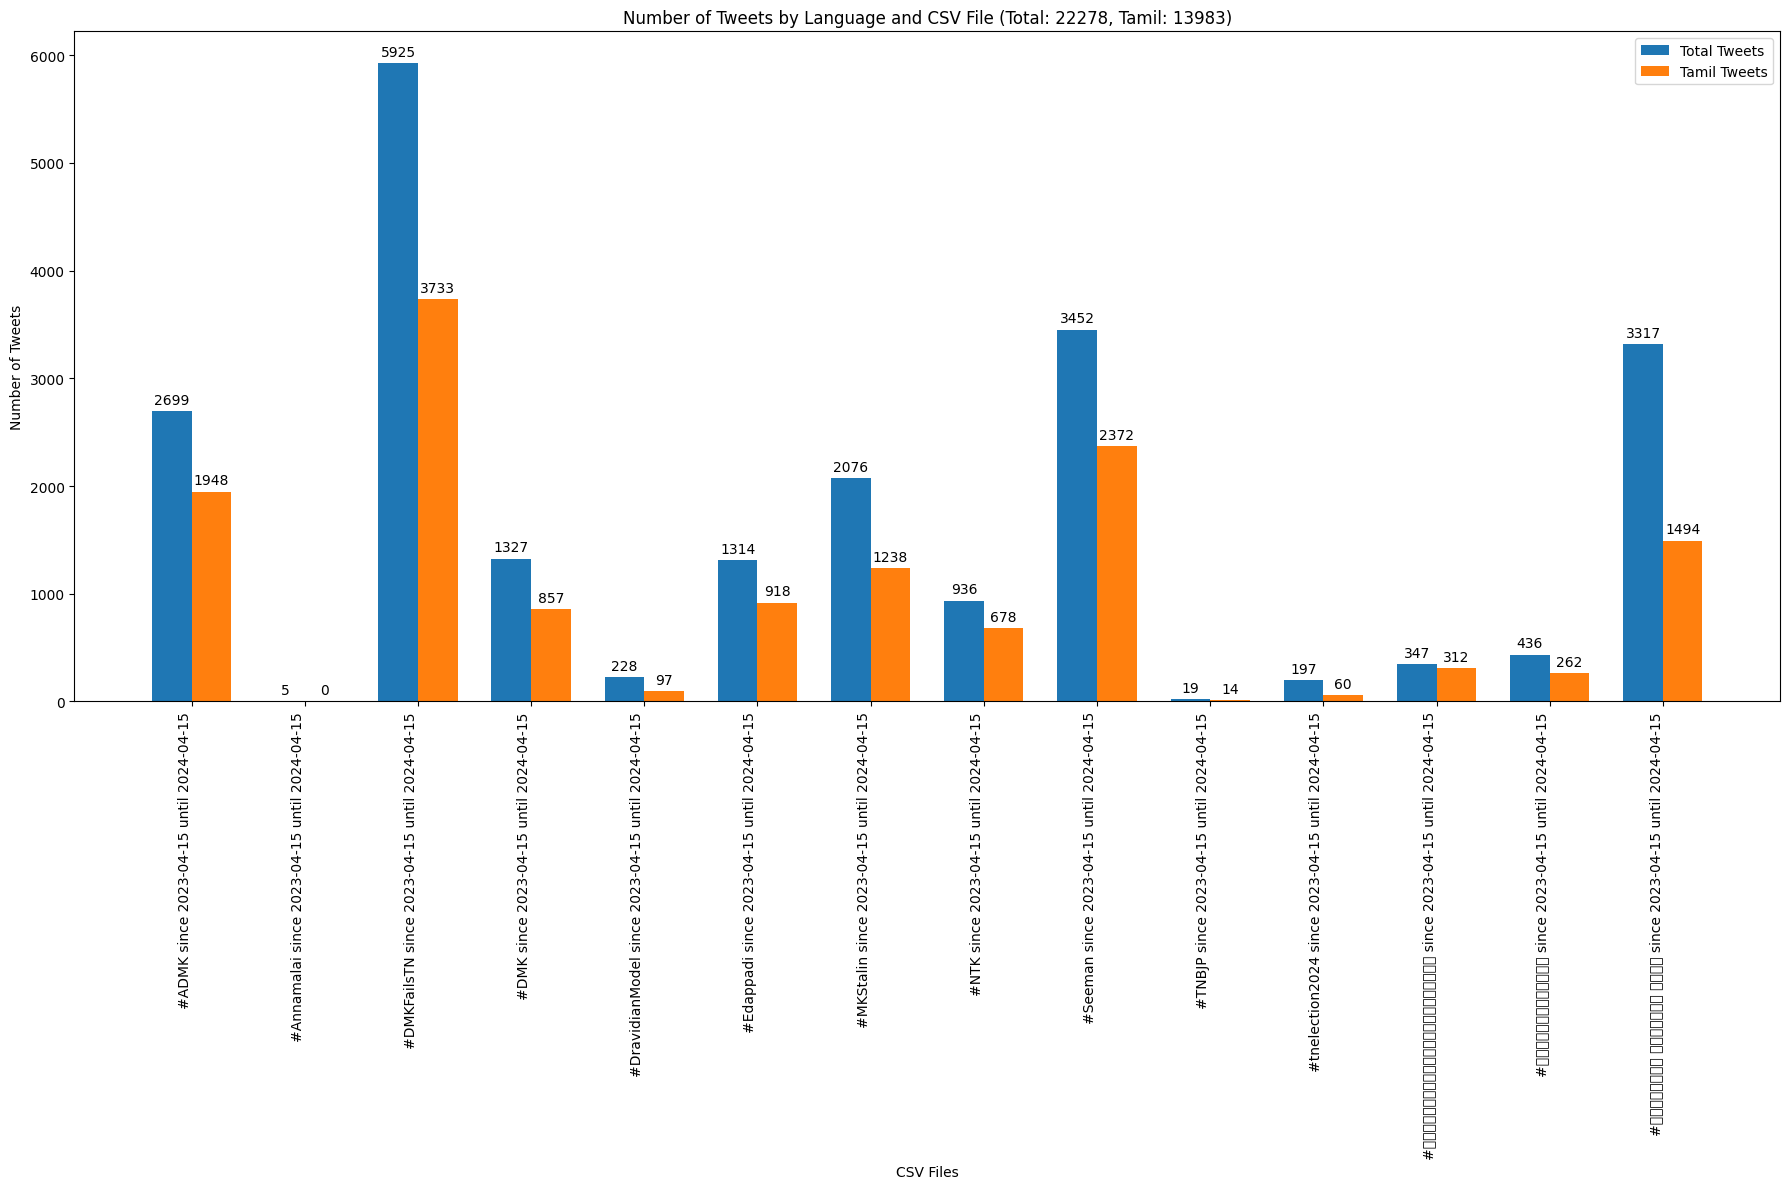

,CSV File,Total Tweets,Tamil Tweets
0,#ADMK since 2023-04-15 until 2024-04-15,2699,1948
1,#Annamalai since 2023-04-15 until 2024-04-15,5,0
2,#DMKFailsTN since 2023-04-15 until 2024-04-15,5925,3733
3,#DMK since 2023-04-15 until 2024-04-15,1327,857
4,#DravidianModel since 2023-04-15 until 2024-04-15,228,97
5,#Edappadi since 2023-04-15 until 2024-04-15,1314,918
6,#MKStalin since 2023-04-15 until 2024-04-15,2076,1238
7,#NTK since 2023-04-15 until 2024-04-15,936,678
8,#Seeman since 2023-04-15 until 2024-04-15,3452,2372
9,#TNBJP since 2023-04-15 until 2024-04-15,19,14


In [108]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display  # For displaying DataFrame nicely in Jupyter

# Set the font to a font family that supports Tamil characters
matplotlib.rcParams['font.family'] = 'Tamil Sangam MN'

def count_tweets_in_csv(directory):
    tweet_counts = {}
    total_tweets = 0
    tamil_tweet_counts = {}
    total_tamil_tweets = 0  # Initialize counter for total Tamil tweets
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            count = len(df)
            total_tweets += count
            label = filename.replace('.csv', '').replace('_', ' ')
            tweet_counts[label] = count
            # Count Tamil tweets
            tamil_count = (df['lang'] == 'ta').sum()
            tamil_tweet_counts[label] = tamil_count
            total_tamil_tweets += tamil_count
    return tweet_counts, total_tweets, tamil_tweet_counts, total_tamil_tweets

def plot_tweet_counts(tweet_counts, total_tweets, tamil_tweet_counts, total_tamil_tweets):
    plt.figure(figsize=(18, 12))  # Increase the figure size
    labels = list(tweet_counts.keys())
    total_values = list(tweet_counts.values())
    tamil_values = list(tamil_tweet_counts.values())

    x = range(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(18, 12))  # Explicitly set the size of the subplot
    rects1 = ax.bar(x, total_values, width, label='Total Tweets')
    rects2 = ax.bar([p + width for p in x], tamil_values, width, label='Tamil Tweets')

    ax.set_xlabel('CSV Files')
    ax.set_ylabel('Number of Tweets')
    ax.set_title('Number of Tweets by Language and CSV File (Total: {}, Tamil: {})'.format(total_tweets, total_tamil_tweets))
    ax.set_xticks([p + width / 2 for p in x])
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.xticks(rotation=90, ha="right")
    plt.tight_layout()
    plt.savefig('tweet_counts_plot.png')  # Save the plot to a file
    plt.show()

    # Display the counts in a table format using DataFrame
    data = {
        "CSV File": labels,
        "Total Tweets": total_values,
        "Tamil Tweets": tamil_values
    }
    df_counts = pd.DataFrame(data)
    display(df_counts)  # Use display for nicer output in Jupyter Notebooks

# Directory containing your CSV files
directory = 'D:\\Tamil NLP\\Twitter Data'

# Count tweets in each CSV and get total tweets and Tamil tweet counts
tweet_counts, total_tweets, tamil_tweet_counts, total_tamil_tweets = count_tweets_in_csv(directory)

# Plot the counts and display the table
plot_tweet_counts(tweet_counts, total_tweets, tamil_tweet_counts, total_tamil_tweets)

In [109]:
total_tweets

22278

In [110]:
total_tamil_tweets

13983